In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
train = pd.read_csv("Data/train.csv", index_col = 'id')
test = pd.read_csv("Data/test.csv", index_col = 'id')

In [7]:
train.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test.head()

,keyword,location,text
id,,,
0,NaN,NaN,Just happened a terrible car crash
2,NaN,NaN,"Heard about #earthquake is different cities, s..."
3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [14]:
# Check whether there is an id existing in both train and test 
set(train.index).intersection(set(test.index))

set()

# Data Visualization

First, look at the distrubution of the target variable

In [18]:
train['target'].value_counts() / train.shape[0] * 100

0    57.034021
1    42.965979
Name: target, dtype: float64

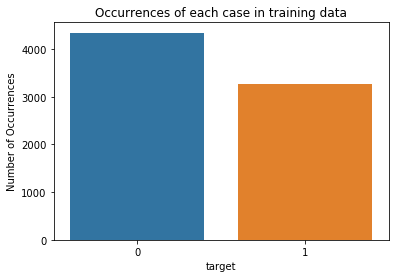

In [21]:
# Let's plot
sns.countplot(x = 'target', data = train)
plt.title('Occurrences of each case in training data')
plt.ylabel('Number of Occurrences')
plt.show()

# N-grams Analysis

### Import stopwords

In [24]:
from wordcloud import STOPWORDS

In [58]:
def ngram(text, n = 1):
    tokens = [t for t in text.lower().split(" ") if t != "" if t not in STOPWORDS]
    temp = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in temp]

In [65]:
sample = "Data Visualisation and Word2Vec"
temp = ngram(sample, 2)

# Most Frequency Word Function

In [112]:
from collections import defaultdict
import plotly.graph_objs as go
import plotly.offline as py
from plotly import subplots

In [140]:
def freq_word_plot(data, color = 'black'):
    plot = go.Bar(y = data['word'], x = data['count'],
                  marker = dict(color = color), showlegend = False,
                  orientation = 'h')
    return plot

In [96]:
# Count occurrences in each case
# Case 0
freq_dict0 = defaultdict(int)
for text in train[train['target'] == 0].text:
    for word in ngram(text):
        freq_dict0[word] += 1

# Case 1
freq_dict1 = defaultdict(int)
for text in train[train['target'] == 1].text:
    for word in ngram(text):
        freq_dict1[word] += 1

In [122]:
freq0_frame = pd.DataFrame(sorted(freq_dict0.items(), key=lambda x: x[1])[::-1]) # [::-1] means descending sort
freq1_frame = pd.DataFrame(sorted(freq_dict1.items(), key=lambda x: x[1])[::-1])

freq0_frame.columns = ['word', 'count']
freq1_frame.columns = ['word', 'count']

In [141]:
# Plot top 30 most frequent words in each case
trace0 = freq_word_plot(freq0_frame.head(30)[::-1])
trace1 = freq_word_plot(freq1_frame.head(30)[::-1])

fig = subplots.make_subplots(rows = 1, cols = 2,
                          subplot_titles = ['Non Disaster', 'Disaster'],
                            vertical_spacing=.04)
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(paper_bgcolor = 'lightgrey', height = 800, width = 600)
py.iplot(fig)

Note that we can also check bigrams, as well as other meta features, such as number of words, number of punctuations, etc.

# Text Preprocessing

In [158]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re

In [150]:
stop = stopwords.words('english')
stem = SnowballStemmer('english')

In [156]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

def text_preprocess(data, column, stopwords_list, stemmer):
    new = data.copy()
    new[column] = new[column].apply(lambda x: remove_URL(x))
    new[column] = new[column].apply(lambda x: remove_URL(x))
    new[column] = new[column].apply(lambda x: remove_URL(x))

    # Lowercase all words
    new[column] = new[column].apply(lambda x: ' '.join(s.lower() for s in str(x).split()))
    
    # Remove stopwords
    new[column] = new[column].apply(lambda x: ' '.join(s for s in x.split() if s not in stopwords_list))
    
    # Stemmalize (?) words
    new[column] = new[column].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
    
    return new

In [161]:
train_processed = text_preprocess(train, 'text', stopwords_list = stop, stemmer = stem)
test_processed = text_preprocess(test, 'text', stopwords_list = stop, stemmer = stem)

In [164]:
train_processed.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,deed reason #earthquak may allah forgiv us,1
4,NaN,NaN,forest fire near la rong sask. canada,1
5,NaN,NaN,resid ask shelter place notifi officers. evacu...,1
6,NaN,NaN,"13,000 peopl receiv #wildfir evacu order calif...",1
7,NaN,NaN,got sent photo rubi #alaska smoke #wildfir pou...,1


In [165]:
train_processed.to_csv('Data/train_processed_20200525.csv')
test_processed.to_csv('Data/test_processed_20200525.csv')

That's all for Data Preprocessing. Next, we will implement some Machine Learning models.<br>Stay tuned!